In [3]:
from urllib.request import urlopen, Request

In [77]:
from bs4 import BeautifulSoup
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [98]:
from matplotlib import pyplot as plt

In [78]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...


True

In [9]:
finviz_url = "https://finviz.com/quote.ashx?t="
tickers = ["AMZN", "FB", "GOOG"]

In [20]:
news_tables = {}

In [34]:
for ticker in tickers:
    url = finviz_url + ticker
    
    req = Request(url = url, headers = {'user-agent': 'educational'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    news_tables[ticker]=news_table
    
    
    

In [63]:
parsed_data = []
for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):

        title = row.a.text
        timestamp = row.td.text.split(' ')
        
        if len(timestamp) == 1:
            time = timestamp[0][0:7]
        else :
            date = timestamp[0]
            time = timestamp[1][0:7]

        parsed_data.append([ticker, date, time, title])

In [68]:
#parsed_data

In [65]:
#for index, row in enumerate(amazon_rows):
 #   title = row.a.text
  #  timestamp = row.td.text
   # print(timestamp, ': ', title)
    

In [107]:
df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])

In [108]:
df

,ticker,date,time,title
0,AMZN,Jun-29-21,03:35PM,Is Amazon Stock A Buy Right Now? Here's What E...
1,AMZN,Jun-29-21,02:13PM,Amazon scoops up exclusive rights to celebrity...
2,AMZN,Jun-29-21,02:12PM,What Facebooks antitrust win means for big tech
3,AMZN,Jun-29-21,02:06PM,"Facebook Got a Big Win, but Megacap Regulator..."
4,AMZN,Jun-29-21,01:57PM,"U.S., European suppliers scramble to secure Ch..."
...,...,...,...,...
295,GOOG,Jun-24-21,05:46PM,"Microsoft Opens Windows, But Reverts to Old Co..."
296,GOOG,Jun-24-21,05:38PM,Instagram Tests Letting Users Post to Feeds fr...
297,GOOG,Jun-24-21,04:48PM,10 Medical Device Stocks for 2021
298,GOOG,Jun-24-21,04:42PM,Microsoft closes trading with a $2 trillion ma...


In [109]:
vader = SentimentIntensityAnalyzer()

In [110]:
vader.polarity_scores(df.title[1])

{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.296}

In [111]:
df['compound'] = df['title'].apply(lambda title: vader.polarity_scores(title)['compound'] )


In [90]:

#df['neutral'] = df['title'].apply(lambda title: vader.polarity_scores(title)['neu'] )
#df['negative'] = df['title'].apply(lambda title: vader.polarity_scores(title)['pos'] )
#df['positive'] = df['title'].apply(lambda title: vader.polarity_scores(title)['neg'] )

In [112]:
df.head()

,ticker,date,time,title,compound
0,AMZN,Jun-29-21,03:35PM,Is Amazon Stock A Buy Right Now? Here's What E...,0.1779
1,AMZN,Jun-29-21,02:13PM,Amazon scoops up exclusive rights to celebrity...,0.2960
2,AMZN,Jun-29-21,02:12PM,What Facebooks antitrust win means for big tech,0.5859
3,AMZN,Jun-29-21,02:06PM,"Facebook Got a Big Win, but Megacap Regulator...",-0.2500
4,AMZN,Jun-29-21,01:57PM,"U.S., European suppliers scramble to secure Ch...",-0.2263


In [113]:
df['date'] = pd.to_datetime(df.date).dt.date

In [114]:
plt.figure(figsize = (10, 8))

mean_df = df.groupby(['ticker', 'date']).mean()

<Figure size 720x576 with 0 Axes>

In [115]:
print(mean_df)

                   compound
ticker date                
AMZN   2021-06-24  0.216142
       2021-06-25  0.155691
       2021-06-26  0.216775
       2021-06-27  0.194700
       2021-06-28  0.149954
       2021-06-29  0.231350
FB     2021-06-23  0.114771
       2021-06-24  0.161844
       2021-06-25  0.109978
       2021-06-26  0.529200
       2021-06-27 -0.006825
       2021-06-28  0.167490
       2021-06-29  0.070468
GOOG   2021-06-24 -0.027017
       2021-06-25  0.070282
       2021-06-26  0.163483
       2021-06-27  0.182667
       2021-06-28  0.062288
       2021-06-29  0.117600


In [116]:
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis = 'columns').transpose()

<AxesSubplot:xlabel='date'>

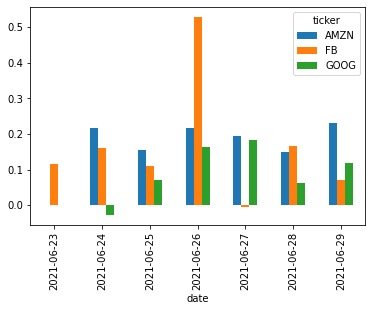

In [118]:
mean_df.plot(kind= 'bar')